<a href="https://colab.research.google.com/github/JapiKredi/Pinnacle_AI_program_AnalyticsVidyha/blob/main/Ridge_and_Lasso_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Defining independent variable as angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(10,360,3)])

In [3]:
x

array([0.17453293, 0.2268928 , 0.27925268, 0.33161256, 0.38397244,
       0.43633231, 0.48869219, 0.54105207, 0.59341195, 0.64577182,
       0.6981317 , 0.75049158, 0.80285146, 0.85521133, 0.90757121,
       0.95993109, 1.01229097, 1.06465084, 1.11701072, 1.1693706 ,
       1.22173048, 1.27409035, 1.32645023, 1.37881011, 1.43116999,
       1.48352986, 1.53588974, 1.58824962, 1.6406095 , 1.69296937,
       1.74532925, 1.79768913, 1.85004901, 1.90240888, 1.95476876,
       2.00712864, 2.05948852, 2.11184839, 2.16420827, 2.21656815,
       2.26892803, 2.32128791, 2.37364778, 2.42600766, 2.47836754,
       2.53072742, 2.58308729, 2.63544717, 2.68780705, 2.74016693,
       2.7925268 , 2.84488668, 2.89724656, 2.94960644, 3.00196631,
       3.05432619, 3.10668607, 3.15904595, 3.21140582, 3.2637657 ,
       3.31612558, 3.36848546, 3.42084533, 3.47320521, 3.52556509,
       3.57792497, 3.63028484, 3.68264472, 3.7350046 , 3.78736448,
       3.83972435, 3.89208423, 3.94444411, 3.99680399, 4.04916

In [4]:
#Setting seed for reproducability
# The np.random.seed(10) function initializes the random number generator with a specific seed value (in this case, 10).
# This means that any random numbers generated after setting the seed will be the same each time you run the code.
np.random.seed(10)

In [5]:
#Defining the target/dependent variable as sine of the independent variable
y = np.sin(x) + np.random.normal(0,0.15,len(x))

In [6]:
y

array([ 0.37338615,  0.3322429 ,  0.04382731,  0.32431058,  0.46780699,
        0.31460543,  0.5092983 ,  0.53132035,  0.55983662,  0.57562499,
        0.70774154,  0.86245397,  0.57457995,  0.90895069,  0.82230527,
        0.88592269,  0.67755776,  0.89489024,  1.1214746 ,  0.75853412,
        0.64303338,  0.69479891,  1.01020625,  1.33937228,  1.15882176,
        1.24708803,  1.01426321,  1.20954715,  0.95687685,  1.08452678,
        0.94471017,  0.89197371,  0.98116794,  0.87409727,  1.12345482,
        0.93555978,  0.94297909,  0.80652245,  1.01750841,  0.68884008,
        0.86507918,  0.67872292,  0.55374337,  0.58265845,  0.4949728 ,
        0.54167179,  0.47904823,  0.53163511,  0.52314405,  0.36861809,
        0.33813434,  0.33573584,  0.16094003,  0.297033  ,  0.26550681,
        0.11769286,  0.39410505,  0.12016643, -0.08659734, -0.17619641,
       -0.20847552, -0.30021039, -0.10631958, -0.43023966, -0.38677492,
       -0.50201267, -0.31254413, -0.72782148, -0.61356778, -0.62

In [7]:
#Creating the dataframe using independent and dependent variable
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

In [8]:
#Printing first 5 rows of the data
data.head(10)

,x,y
0,0.174533,0.373386
1,0.226893,0.332243
2,0.279253,0.043827
3,0.331613,0.324311
4,0.383972,0.467807
5,0.436332,0.314605
6,0.488692,0.509298
7,0.541052,0.531320
8,0.593412,0.559837
9,0.645772,0.575625


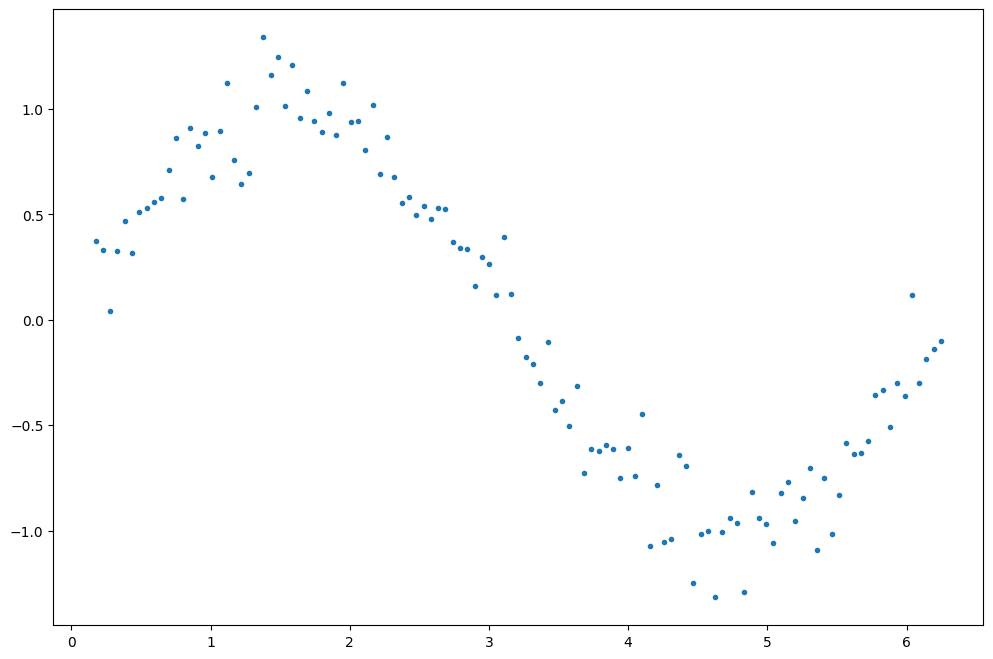

In [9]:
#Plotting the dependent and independent variables
plt.figure(figsize=(12,8))
plt.plot(data['x'],data['y'],'.')

In [10]:
# polynomial regression with powers of x from 1 to 15
for i in range(2,16):  #power of 1 is already there, hence starting with 2
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.174533,0.373386,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07


### Creating test and train Set Randomly

In [11]:
data['randNumCol'] = np.random.randint(1, 6, data.shape[0])
train=data[data['randNumCol']<=3]
test=data[data['randNumCol']>3]
train = train.drop('randNumCol', axis=1)
test = test.drop('randNumCol', axis=1)

In [12]:
train.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,0.000037,0.000010,0.000003,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,0.000146,0.000048,0.000016,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,0.000472,0.000181,0.000070,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07
5,0.436332,0.314605,0.190386,0.083072,0.036247,0.015816,0.006901,0.003011,0.001314,0.000573,0.000250,1.091418e-04,4.762210e-05,2.077906e-05,9.066575e-06,3.956040e-06
6,0.488692,0.509298,0.238820,0.116709,0.057035,0.027873,0.013621,0.006657,0.003253,0.001590,0.000777,3.796552e-04,1.855345e-04,9.066928e-05,4.430937e-05,2.165364e-05


## Linear Regression

In [13]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression

In [14]:
#Separating the independent and dependent variables
X_train = train.drop('y', axis=1).values
y_train = train['y'].values
X_test = test.drop('y', axis=1).values
y_test = test['y'].values

In [15]:
X_train

array([[2.79252680e-01, 7.79820595e-02, 2.17766991e-02, ...,
        6.28008545e-08, 1.75373070e-08, 4.89733997e-09],
       [3.31612558e-01, 1.09966889e-01, 3.64664012e-02, ...,
        5.86411652e-07, 1.94461468e-07, 6.44858648e-08],
       [3.83972435e-01, 1.47434831e-01, 5.66109112e-02, ...,
        3.94367057e-06, 1.51426079e-06, 5.81434405e-07],
       ...,
       [6.03883921e+00, 3.64675790e+01, 2.20221846e+02, ...,
        1.42034898e+10, 8.57725910e+10, 5.17966886e+11],
       [6.14355897e+00, 3.77433168e+01, 2.31878292e+02, ...,
        1.77607133e+10, 1.09113989e+11, 6.70348229e+11],
       [6.19591884e+00, 3.83894103e+01, 2.37857671e+02, ...,
        1.98323587e+10, 1.22879685e+11, 7.61352555e+11]])

Training Error: 0.2131443095817389
Testing Error: 0.18974033118165395


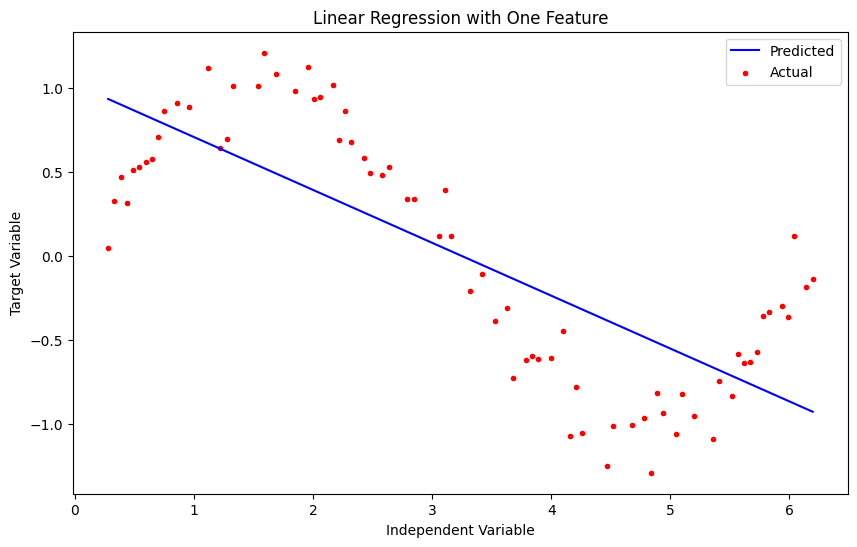

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming X_train, y_train, X_test, and y_test are already defined

# Standardize the independent variable
scaler = StandardScaler()
independent_variable_train = scaler.fit_transform(X_train[:, 0:1])
independent_variable_test = scaler.transform(X_test[:, 0:1])

# Linear regression with one feature
linreg = LinearRegression()
linreg.fit(independent_variable_train, y_train)
y_train_pred = linreg.predict(independent_variable_train)

# Calculate training error (RSS)
rss_train = sum((y_train_pred - y_train) ** 2) / X_train.shape[0]

# Predict on test data
y_test_pred = linreg.predict(independent_variable_test)

# Calculate testing error (RSS)
rss_test = sum((y_test_pred - y_test) ** 2) / X_test.shape[0]

print("Training Error:", rss_train)
print("Testing Error:", rss_test)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(X_train[:, 0], y_train_pred, label='Predicted', color='blue')
plt.scatter(X_train[:, 0], y_train, label='Actual', color='red', marker='.')
plt.xlabel('Independent Variable')
plt.ylabel('Target Variable')
plt.title('Linear Regression with One Feature')
plt.legend()
plt.show()

Training Error: 0.02147248177096571
Testing Error: 0.030451878881969232


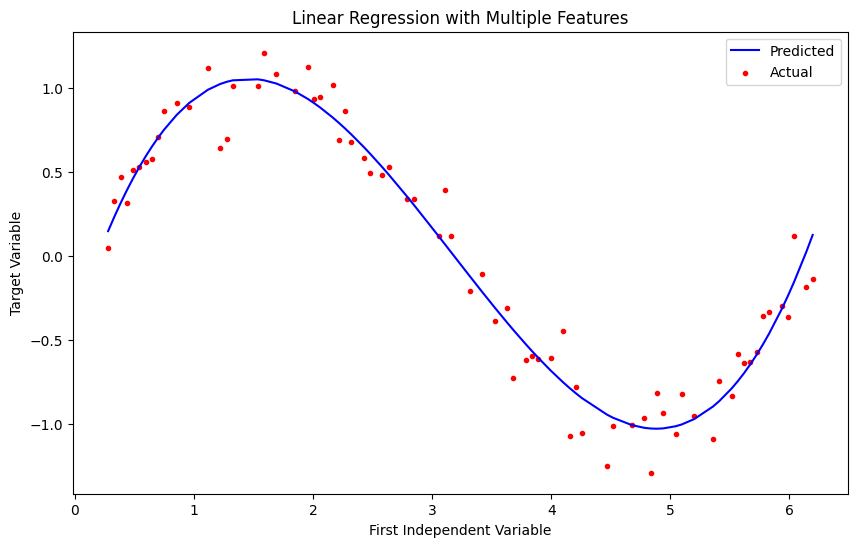

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming X_train, y_train, X_test, and y_test are already defined

# Standardize the independent variables
scaler = StandardScaler()
independent_variable_train = scaler.fit_transform(X_train[:, 0:3])
independent_variable_test = scaler.transform(X_test[:, 0:3])

# Linear regression with multiple features
linreg = LinearRegression()
linreg.fit(independent_variable_train, y_train)
y_train_pred = linreg.predict(independent_variable_train)

# Calculate training error (RSS)
rss_train = sum((y_train_pred - y_train) ** 2) / X_train.shape[0]

# Predict on test data
y_test_pred = linreg.predict(independent_variable_test)

# Calculate testing error (RSS)
rss_test = sum((y_test_pred - y_test) ** 2) / X_test.shape[0]

print("Training Error:", rss_train)
print("Testing Error:", rss_test)

# Plotting the results for the first feature
plt.figure(figsize=(10, 6))
plt.plot(X_train[:, 0], y_train_pred, label='Predicted', color='blue')
plt.scatter(X_train[:, 0], y_train, label='Actual', color='red', marker='.')
plt.xlabel('First Independent Variable')
plt.ylabel('Target Variable')
plt.title('Linear Regression with Multiple Features')
plt.legend()
plt.show()

Training Error: 0.019095054809245046
Testing Error: 0.02771729284847421


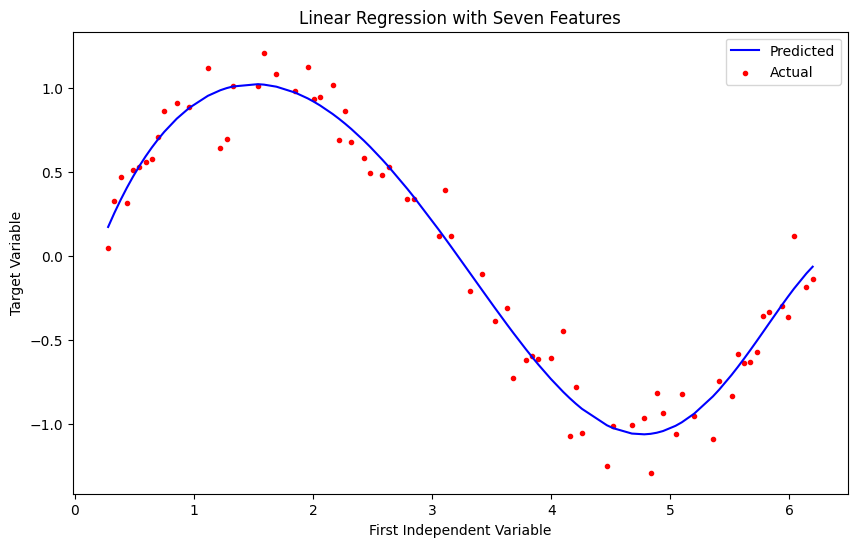

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming X_train, y_train, X_test, and y_test are already defined

# Standardize the independent variables
scaler = StandardScaler()
independent_variable_train = scaler.fit_transform(X_train[:, 0:7])
independent_variable_test = scaler.transform(X_test[:, 0:7])

# Linear regression with seven features
linreg = LinearRegression()
linreg.fit(independent_variable_train, y_train)
y_train_pred = linreg.predict(independent_variable_train)

# Calculate training error (RSS)
rss_train = sum((y_train_pred - y_train) ** 2) / X_train.shape[0]

# Predict on test data
y_test_pred = linreg.predict(independent_variable_test)

# Calculate testing error (RSS)
rss_test = sum((y_test_pred - y_test) ** 2) / X_test.shape[0]

print("Training Error:", rss_train)
print("Testing Error:", rss_test)

# Plotting the results for the first feature
plt.figure(figsize=(10, 6))
plt.plot(X_train[:, 0], y_train_pred, label='Predicted', color='blue')
plt.scatter(X_train[:, 0], y_train, label='Actual', color='red', marker='.')
plt.xlabel('First Independent Variable')
plt.ylabel('Target Variable')
plt.title('Linear Regression with Seven Features')
plt.legend()
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Define a function which will fit a linear regression model, plot the results, and return the coefficients
def linear_regression(train_x, train_y, test_x, test_y, features, models_to_plot):
    # Standardize the independent variables
    scaler = StandardScaler()
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)

    # Fit the model
    linreg = LinearRegression()
    linreg.fit(train_x, train_y)
    train_y_pred = linreg.predict(train_x)
    test_y_pred = linreg.predict(test_x)

    # Check if a plot is to be made for the entered features
    if features in models_to_plot:
        plt.subplot(models_to_plot[features])
        plt.tight_layout()
        plt.plot(train_x[:, 0], train_y_pred, label='Predicted', color='blue')
        plt.scatter(train_x[:, 0], train_y, label='Actual', color='red', marker='.')
        plt.title('Number of Predictors: %d' % features)
        plt.xlabel('First Independent Variable')
        plt.ylabel('Target Variable')
        plt.legend()

    # Return the result in pre-defined format
    rss_train = sum((train_y_pred - train_y) ** 2) / train_x.shape[0]
    ret = [rss_train]

    rss_test = sum((test_y_pred - test_y) ** 2) / test_x.shape[0]
    ret.extend([rss_test])

    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)

    return ret

# Example usage
# Assuming X_train, y_train, X_test, y_test, and models_to_plot are already defined
# features = number of features used in the model
# result = linear_regression(X_train[:, :features], y_train, X_test[:, :features], y_test, features, models_to_plot)

In [20]:
#Initialize a dataframe to store the results:
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['Number_of_variable_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

In [21]:
#Define the number of features for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

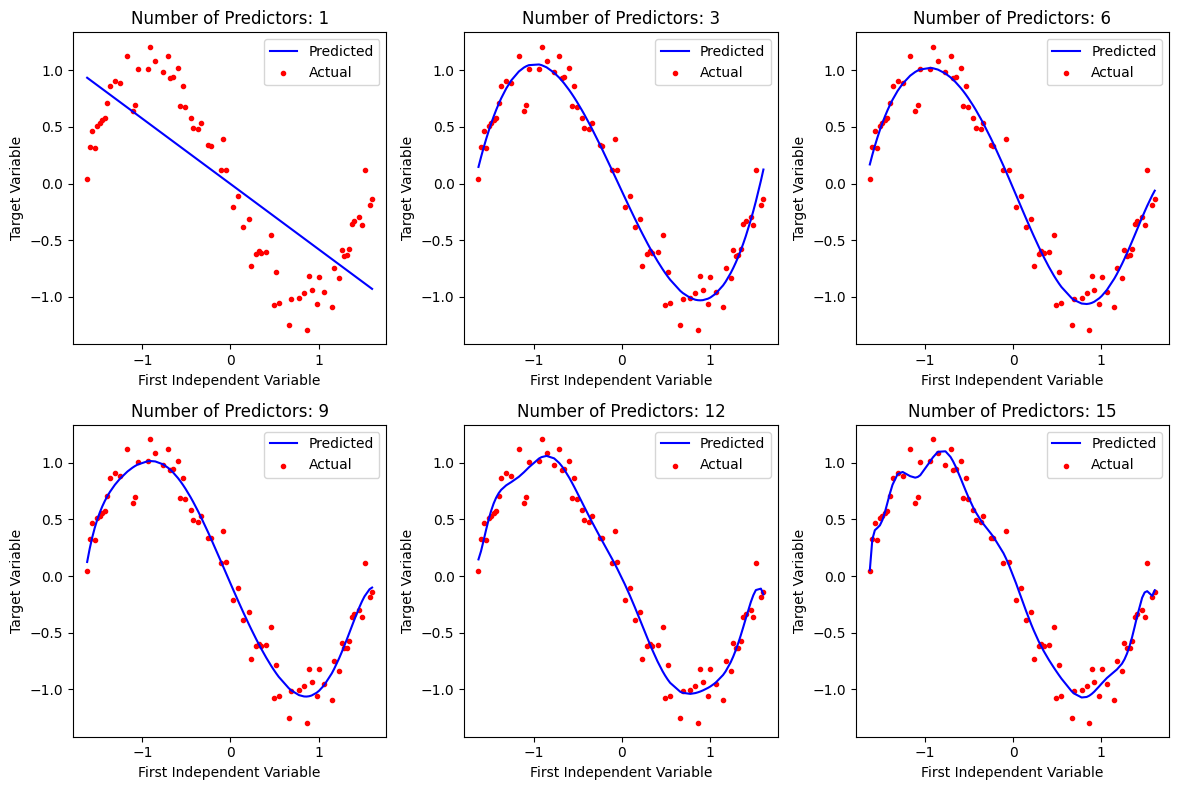

In [22]:
#Iterate through all powers and store the results in a matrix form
plt.figure(figsize=(12,8))
for i in range(1,16):
    train_x = X_train[:,0:i]
    train_y = y_train
    test_x = X_test[:,0:i]
    test_y = y_test

    # Get the results from linear_regression
    results = linear_regression(train_x,train_y, test_x, test_y, features=i, models_to_plot=models_to_plot)

    # Assign results to the DataFrame, ensuring correct column indexing
    coef_matrix_simple.iloc[i-1,0:len(results)] = results

In [23]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
Number_of_variable_1,0.21,0.19,-0.003,-0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_2,0.21,0.19,-0.003,-0.72,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_3,0.021,0.03,-0.003,4,-12,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_4,0.021,0.03,-0.003,4.2,-13,8.5,-0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_5,0.02,0.023,-0.003,2.2,0.1,-21,30,-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_6,0.019,0.028,-0.003,4.5,-20,48,-85,80,-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_7,0.019,0.028,-0.003,4.3,-18,39,-64,53,-10,-4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_8,0.019,0.032,-0.003,9.3,-85,4.4e+02,-1.3e+03,2.4e+03,-2.4e+03,1.3e+03,-3.1e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_9,0.019,0.032,-0.003,10,-1e+02,5.6e+02,-1.8e+03,3.6e+03,-4.2e+03,2.9e+03,-1.1e+03,1.6e+02,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_10,0.018,0.044,-0.003,30,-4.6e+02,3.6e+03,-1.7e+04,4.8e+04,-9e+04,1.1e+05,-8.1e+04,3.4e+04,-6.3e+03,NaN,NaN,NaN,NaN,NaN


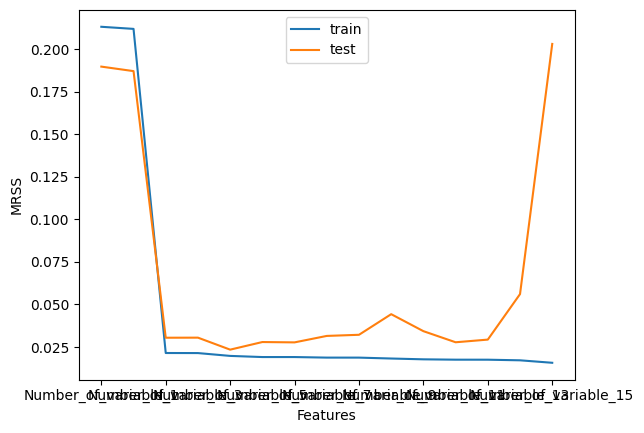

In [24]:
coef_matrix_simple[['mrss_train','mrss_test']].plot()
plt.xlabel('Features')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])